# Assignment: Malicious and Benign Websites


## Kaggle Competition: https://www.kaggle.com/xwolf12/malicious-and-benign-websites

The project consisted to evaluate different classification models to predict malicious and benign websites, based on application layer and network characteristics. The data were obtained by using different verified sources of benign and malicious URL's, in a low interactive client honeypot to isolate network traffic. We used additional tools to get other information, such as, server country with Whois.

This is the first version and we have some initial results from applying machine learning classifiers in a bachelor thesis. Further details on the data process making and the data description can be found in the article below.

### Dataset
This is an important topic and one of the most difficult thing to process, according to other articles and another open resource, we used three black list:

* machinelearning.inginf.units.it/data-andtools/hidden-fraudulent-urls-dataset
* malwaredomainlist.com
* zeuztacker.abuse.ch

From them we got around 185181 URLs, we supposed that they were malicious according to their information, we recommend in a next research step to verity them though another security tool, such as, VirusTotal.

## Task 1: Problem Statement
Discuss the problem setting and the first implcations of the given data set... 
* What assumptions can we make about the data?
* What problems are we expecting?

## Task 2: First Data Analysis, Cleaning and Feature Extraction
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...
* Can you use the raw data directly, or should you extract features? What features are suitable ? 


In [9]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [10]:
data = pd.read_csv('dataset.csv' , encoding = "ISO-8859-1" )

In [11]:
data.head()



URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [30]:
data.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [31]:
data.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [12]:
data.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [13]:
data.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [14]:
data['CONTENT_LENGTH']
data_new = data.drop(['CONTENT_LENGTH'],axis=1)
data_new.shape
data_new['DNS_QUERY_TIMES'].fillna((data_new['DNS_QUERY_TIMES'].mean()), inplace=True)
data_new.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [15]:
data_new['Type'].value_counts()
data_new.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


Text(0.5, 1.0, 'Malicious website distributions')

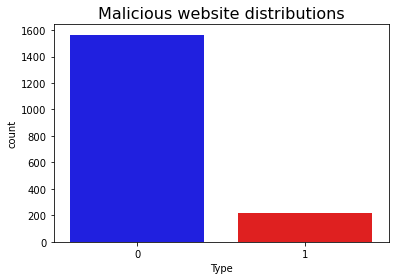

In [36]:
#plotting the normal and anomalous records
colors = ["blue", "red"]
sns.countplot('Type', data=data_new, palette = colors)
plt.title("Malicious website distributions", fontsize = 16)

#As we can see below the class type has relatively lesser number of malicious websites reported. Lets see how we can deal with this

In [17]:
#converting categorical data - using one hot encoding

#number of unique values in object datatype variables

obj=dict()
for column in data_new.select_dtypes(include=[object]):
    obj[column]=len(data_new[column].unique())

obj

{'URL': 1781,
 'CHARSET': 9,
 'SERVER': 240,
 'WHOIS_COUNTRY': 49,
 'WHOIS_STATEPRO': 182,
 'WHOIS_REGDATE': 891,
 'WHOIS_UPDATED_DATE': 594}

In [18]:
#handling datetime variables - WHOIS_REGDATE, WHOIS_UPDATED_DATE

def data_cleaning(data):
    data_copy=data.copy()
    
    data_copy=data_copy.drop('URL', axis=1)
    
    for col in ['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']:
        data_copy[col] = pd.to_datetime(data_copy[col], utc=True, errors='coerce')
    
    data_copy['REGYEAR']=data_copy['WHOIS_REGDATE'].apply(lambda dt: dt.year)
    data_copy['REGMONTH']=data_copy['WHOIS_REGDATE'].apply(lambda dt: dt.month)
    data_copy['REGDAY']=data_copy['WHOIS_REGDATE'].apply(lambda dt: dt.day)
    data_copy['REGHOUR']=data_copy['WHOIS_REGDATE'].apply(lambda dt: dt.hour)
    data_copy['REGMINUTE']=data_copy['WHOIS_REGDATE'].apply(lambda dt: dt.minute)
    
    data_copy['UPDATEDYEAR']=data_copy['WHOIS_UPDATED_DATE'].apply(lambda dt: dt.year)
    data_copy['UPDATEDMONTH']=data_copy['WHOIS_UPDATED_DATE'].apply(lambda dt: dt.month)
    data_copy['UPDATEDDAY']=data_copy['WHOIS_UPDATED_DATE'].apply(lambda dt: dt.day)
    data_copy['UPDATEDHOUR']=data_copy['WHOIS_UPDATED_DATE'].apply(lambda dt: dt.hour)
    data_copy['UPDATEDMINUTE']=data_copy['WHOIS_UPDATED_DATE'].apply(lambda dt: dt.minute)
    
    data_copy = data_copy.drop(['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)
        

    data_copy = data_copy.select_dtypes(include='int64').fillna(data_copy.mean())
    
    return data_copy

In [19]:
data_clean = data_cleaning(data_new)
data_clean.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,Type
0,16,7,7,0,2,700,9,10,1153,832,9,1
1,16,6,17,7,4,1230,17,19,1265,1230,17,0
2,16,6,0,0,0,0,0,0,0,0,0,0
3,17,6,31,22,3,3812,39,37,18784,4380,39,0
4,17,6,57,2,5,4278,61,62,129889,4586,61,0


In [20]:
#We will now scale the cleaned data using StandardScaler()

scale_columns  = ['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'TCP_CONVERSATION_EXCHANGE',
                  'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
                   'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES','APP_PACKETS']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_clean_sc = sc.fit_transform(data_clean[scale_columns])
data_clean_scaled = pd.DataFrame(data_clean_sc, index=data_clean.index, columns=scale_columns)

In [54]:
data_clean_scaled

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS
0,-1.486913,-0.903952,-0.228728,-0.251031,-0.313241,-0.040731,-0.229245,-0.188557,-0.211040,-0.041465,-0.229245
1,-1.486913,-1.123799,0.018249,0.070053,0.277423,-0.031272,-0.037009,0.005471,-0.209437,-0.034362,-0.037009
2,-1.486913,-1.123799,-0.401611,-0.251031,-0.903904,-0.053223,-0.445511,-0.404144,-0.227549,-0.056312,-0.445511
3,-1.450613,-1.123799,0.364017,0.758088,-0.017909,0.014806,0.491640,0.393528,0.041400,0.021849,0.491640
4,-1.450613,-1.123799,1.006157,-0.159292,0.572754,0.023122,1.020290,0.932496,1.632198,0.025526,1.020290
...,...,...,...,...,...,...,...,...,...,...,...
1776,4.974572,1.074670,-0.401611,-0.251031,-0.903904,-0.053223,-0.445511,-0.339468,-0.224886,-0.056312,-0.445511
1777,5.119773,1.294517,-0.401611,-0.251031,-0.903904,-0.053223,-0.445511,-0.361027,-0.225774,-0.056312,-0.445511
1778,5.228675,5.031916,1.648297,-0.159292,0.868086,0.065114,1.645057,1.514582,1.665014,0.067622,1.645057
1779,6.426591,5.031916,-0.401611,-0.251031,-0.903904,-0.053223,-0.445511,-0.404144,-0.227549,-0.056312,-0.445511


In [22]:
#Using one hot encoding to encode the object datatypes variables

def onehot_encode(df, column_dict):
    df_copy = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df_copy[column], prefix=prefix)
        df_copy = pd.concat([df_copy, dummies], axis=1)
        df_copy = df_copy.drop(column, axis=1)
    return df_copy

In [23]:
list= ['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']
for column in list:
    data_new[column] = data_new[column].apply(lambda x: x.lower() if str(x) != 'nan' else x)

encoded_data = onehot_encode(
    data_new[list],
    column_dict={
        'CHARSET': 'CH',
        'SERVER': 'SV',
        'WHOIS_COUNTRY': 'WC',
        'WHOIS_STATEPRO': 'WS'
    }
)

In [24]:
encoded_data

,CH_iso-8859,CH_iso-8859-1,CH_none,CH_us-ascii,CH_utf-8,CH_windows-1251,CH_windows-1252,SV_.v01 apache,SV_294,SV_aeria games & entertainment,...,WS_wc1n,WS_west midlands,WS_wi,WS_widestep@mail.ru,WS_wisconsin,WS_worcs,WS_wv,WS_zh,WS_zhejiang,WS_zug
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1777,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1778,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1779,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data_append = pd.concat([data_clean_scaled, encoded_data, data_clean['Type']], axis=1)
data_append.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,WS_west midlands,WS_wi,WS_widestep@mail.ru,WS_wisconsin,WS_worcs,WS_wv,WS_zh,WS_zhejiang,WS_zug,Type
0,-1.486913,-0.903952,-0.228728,-0.251031,-0.313241,-0.040731,-0.229245,-0.188557,-0.211040,-0.041465,...,0,0,0,0,0,0,0,0,0,1
1,-1.486913,-1.123799,0.018249,0.070053,0.277423,-0.031272,-0.037009,0.005471,-0.209437,-0.034362,...,0,0,0,0,0,0,0,0,0,0
2,-1.486913,-1.123799,-0.401611,-0.251031,-0.903904,-0.053223,-0.445511,-0.404144,-0.227549,-0.056312,...,0,0,0,0,0,0,0,0,0,0
3,-1.450613,-1.123799,0.364017,0.758088,-0.017909,0.014806,0.491640,0.393528,0.041400,0.021849,...,0,0,0,0,0,0,0,0,0,0
4,-1.450613,-1.123799,1.006157,-0.159292,0.572754,0.023122,1.020290,0.932496,1.632198,0.025526,...,0,0,0,0,0,0,0,0,0,0


## Task 3: Train a  Model
* Which ML model would you choose and why?
* Train and evaluate the model using the train data
* Is the data blanced? What are the implications, how can you deal with this?
* Discuss the results -> possible improvements?


In [26]:
train_x=data_append.drop(['Type'], axis=1)
train_y=pd.DataFrame(data_append['Type'])
train_y

,Type
0,1
1,0
2,0
3,0
4,0
...,...
1776,1
1777,1
1778,0
1779,0


In [27]:
#split the data into train and test

from sklearn.model_selection import train_test_split
from sklearn import metrics

data_train, data_test, labels_train, labels_test = train_test_split(train_x, train_y, test_size=0.3, random_state=111)

In [32]:
#We will use Logistic Regression, RFC and KNN

#Logistic Regression

from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(n_jobs=-1, random_state=0)
LGR.fit(data_train, labels_train)
LGR_predictions = LGR.predict(data_test)





C:\Users\Varinder\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
#RFC

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=31, random_state=111).fit(data_train, labels_train)
RFC_predictions = RFC.predict(data_test)

<ipython-input-33-a23f809a00c2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC = RandomForestClassifier(n_estimators=31, random_state=111).fit(data_train, labels_train)


In [34]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200).fit(data_train, labels_train)
knn_predictions = knn.predict(data_test)

<ipython-input-34-6af52b0908a7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier(n_neighbors=200).fit(data_train, labels_train)


## Task 4: Evaluate 
* report the F1-Score on the test data - Who will build the bes model?

In [29]:
#Model Evaluation

####Logistic Regression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# model accuracy for data_test   
accuracy_LGR = LGR.score(data_test, labels_test) 
print ("LGR_Model_Accuracy:" "\n", accuracy_LGR)

    
# creating a classification matrix 
cm_LGR = metrics.classification_report(labels_test, LGR_predictions)
print("LGR_Classification report:" "\n", cm_LGR) 


#### RFC

accuracy_RFC = RFC.score(data_test, labels_test) 
print ("RFC_Model_Accuracy:" "\n", accuracy_RFC)
    
# creating a classification matrix 
cm_RFC = metrics.classification_report(labels_test, RFC_predictions)
print("RFC_Classification report:" "\n", cm_RFC) 

    
#### KNN

accuracy_KNN = knn.score(data_test, labels_test) 
print ("KNN_Model_Accuracy:" "\n", accuracy_KNN)
    
# creating a classification matrix 
cm_KNN = metrics.classification_report(labels_test, knn_predictions)
print("KNN_Classification report:" "\n", cm_KNN)

##as we can see, RFC is the winner in this case with 96.26% accuracy and higher f1 score than the other models

LGR_Model_Accuracy:
 0.9551401869158879
LGR_Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       474
           1       0.97      0.62      0.76        61

    accuracy                           0.96       535
   macro avg       0.96      0.81      0.87       535
weighted avg       0.96      0.96      0.95       535

RFC_Model_Accuracy:
 0.9626168224299065
RFC_Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       474
           1       1.00      0.67      0.80        61

    accuracy                           0.96       535
   macro avg       0.98      0.84      0.89       535
weighted avg       0.96      0.96      0.96       535

KNN_Model_Accuracy:
 0.8859813084112149
KNN_Classification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       474
           1       0.00      0.00

C:\Users\Varinder\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
